# Random Forest Model Training and Evaluation

In this section, we trained and evaluated a Random Forest Regression model for cylinder surface area prediction. Here's a quick overview:

- **Data Preparation**: We loaded and split the data into training and testing sets.

- **Preprocessing**: We applied Standard Scaling to ensure consistent feature scaling.

- **Model Selection**: We chose the powerful Random Forest Regressor.

- **Hyperparameter Tuning**: GridSearchCV helped us find the best model parameters.

- **Model Training**: A pipeline ensured consistent preprocessing during training.

- **Model Evaluation**: We assessed performance using MSE, MAE, and R2 scores.

- **Model Serialization**: The model was saved using joblib.



In [7]:
#libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Loading train and test sets and making feature and target sets

In [8]:
# loading train data and test data
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [9]:
train.head()

,radius,height,surface_area
0,66.696126,93.276272,67038.691832
1,53.165348,29.829335,27724.185654
2,10.317922,3.394904,888.994583
3,63.586253,84.134568,59018.044335
4,33.770050,26.797863,12851.510471


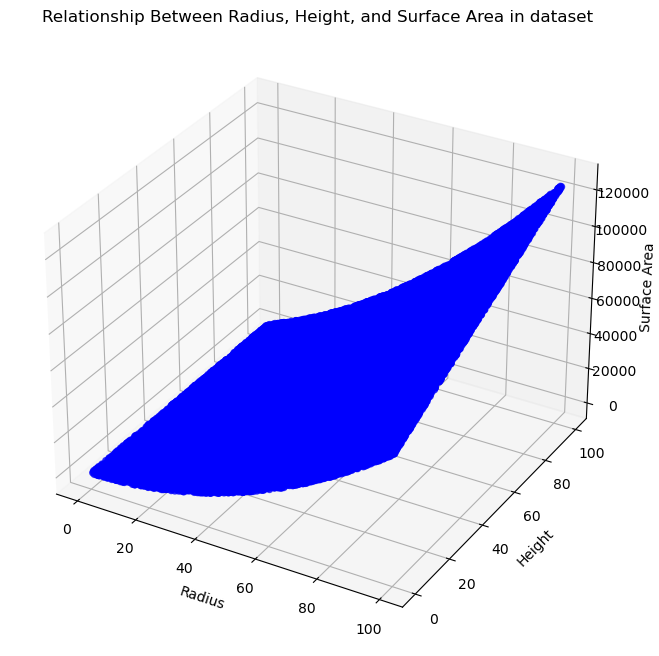

In [21]:
radius = train['radius']
height = train['height']
surface_area = train['surface_area']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(radius, height, surface_area, c='b', marker='o', alpha=0.7)
ax.set_xlabel('Radius')
ax.set_ylabel('Height')
ax.set_zlabel('Surface Area')
plt.title('Relationship Between Radius, Height, and Surface Area in dataset')
plt.show()

In [8]:
#splitting the data into train and test
def split_data(train, test):
    X_train = train[['radius', 'height']]
    y_train = train['surface_area']
    
    X_test = test[['radius', 'height']]
    y_test = test['surface_area']
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(train, test)

### Model training and evaluation

In [11]:
# Preprocessing
preprocessor = StandardScaler()

# Random Forest Model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Creating a pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', random_forest_model)
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Getting the model
rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Best Random Forest Model MSE: {mse}')
print(f'Best Random Forest Model MAE: {mae}')
print(f'Best Random Forest Model R2: {r2}')


c:\Users\Haseeb\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
7 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Haseeb\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Haseeb\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Haseeb\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\ensemble\_

Best Random Forest Model MSE: 11106.539114106028
Best Random Forest Model MAE: 70.32630156199515
Best Random Forest Model R2: 0.999987146494819


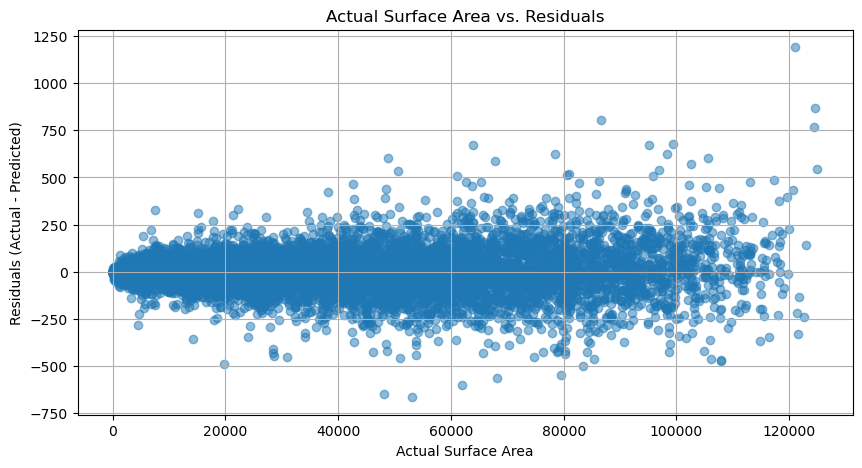

In [15]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.title("Actual Surface Area vs. Residuals")
plt.xlabel("Actual Surface Area")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()


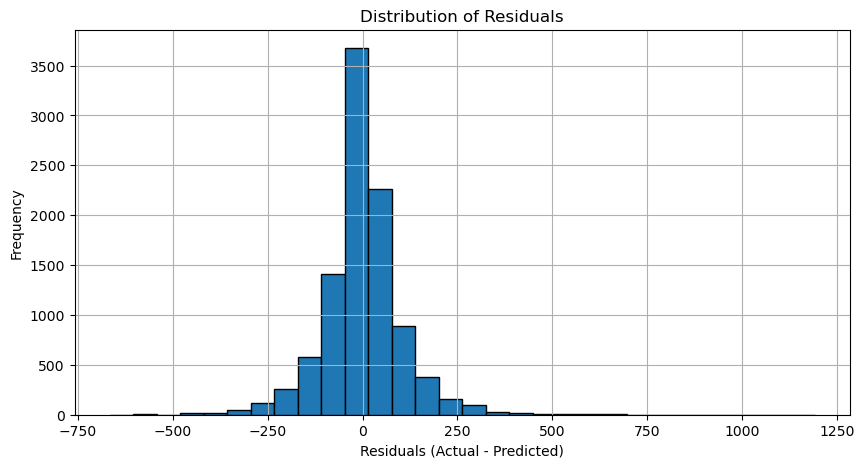

In [16]:

# Residuals Histogram
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### saving the model

In [10]:
#saving the model
import joblib 
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']